<h1>Ada Boost Classifier</h1>

<h3>This data is about traders that are classified as High Frequency Traders, Non HFT and mix. A Decision Tree is used as a classification model.</h3>
<h3>Challenge can be found <a href="https://challengedata.ens.fr/participants/challenges/50/">here</a></h3>

<h3>More details about this data set can be found <a href="https://github.com/jlunamx86/datascience/blob/master/Decision_Tree.ipynb">here</a></h3> 

In [1]:
import pandas as pd

In [2]:
df_raw_test_x = pd.read_csv('./ML_TREE/AMF_test_X_uDs0jHH.csv',index_col=0)

In [3]:
df_raw_test_x.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_106,Date_12,Adelaide,1.114754,68.0,NaN,0.000012,22.905096,0.000061,0.003870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,Isin_94,Date_2,Adelaide,1.666667,5.0,NaN,0.001970,67.630572,0.001970,0.005786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Isin_106,Date_13,Adelaide,1.088235,37.0,NaN,0.000000,39.506490,0.000000,0.000485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,Isin_106,Date_7,Adelaide,2.250000,4.5,NaN,0.000000,103.378733,0.000000,0.004708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,Isin_106,Date_20,Adelaide,1.266667,19.0,NaN,0.000026,49.417177,0.000063,0.000152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [4]:
df_raw_train_x = pd.read_csv('./ML_TREE/AMF_train_X_XCZw8r3.csv',index_col=0)

In [5]:
df_raw_train_x.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
Index,,,,,,,,,,,,,,,,,,,,,
1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38


In [6]:
df_raw_train_y = pd.read_csv('./ML_TREE/AMF_train_Y_omYQJZL.csv')

In [7]:
df_raw_train_y.head()

,Trader,type
0,Trader_285,MIX
1,Trader_114,NON HFT
2,Trader_110,NON HFT
3,Trader_57,NON HFT
4,Trader_128,NON HFT


In [8]:
df_train_x_labeled = pd.merge(df_raw_train_x,df_raw_train_y, on="Trader")

In [9]:
df_train_x_labeled.head()

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


In [10]:
#remove mix to get binary value (HFT & NON HFT)
df_train_x_labeled = df_train_x_labeled[df_train_x_labeled["type"] != "MIX"]

In [11]:
def fn_is_HFT(row):
    if row["type"] == "HFT":
        return 1
    else:
        return 0
    
df_train_x_labeled["is_hft"] = df_train_x_labeled.apply(lambda row:fn_is_HFT(row), axis=1)
df_train_x_labeled = df_train_x_labeled.drop(columns=['type'])

In [12]:
df_train_x_labeled.head(5)

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,is_hft
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,419.688500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,0.003374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,0.000599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,0
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,6.152666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,0.001364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,0


In [13]:
df_train_x_labeled.describe()

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,is_hft
count,52699.000000,54299.000000,17759.000000,54299.000000,54299.000000,54299.000000,54299.000000,54299.000000,54299.000000,54299.000000,...,35750.000000,35750.000000,35695.000000,35695.000000,35695.000000,35809.000000,35809.000000,35809.000000,54299.000000,54299.000000
mean,51.444705,21.042564,78.194798,166.118823,4276.099994,195.374375,1875.560802,432.566096,6835.458554,13100.845984,...,642.548843,399.892474,321.454553,656.129027,418.776488,320.504203,680.676579,423.887606,304.896057,0.588409
std,185.873322,74.134559,329.481674,2150.696994,6172.533886,2240.184197,6764.427934,3213.335836,11711.518320,14812.727453,...,1935.710543,1791.122734,1826.830438,1963.281111,1843.269884,1799.581002,1977.900063,1821.006661,728.111636,0.492126
min,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000,0.000000
25%,4.028571,2.204804,2.449518,0.000000,62.044647,0.000000,0.551091,0.000006,18.285153,131.017970,...,24.593915,0.104581,0.000002,23.728049,0.105180,0.000008,26.329441,0.286100,13.000000,0.000000
50%,9.285714,5.125000,9.857143,0.000000,1191.793415,0.000078,9.195331,0.023615,326.850040,5017.511000,...,113.022647,8.599901,0.000038,115.620129,10.048302,0.000117,123.825931,12.401300,50.000000,1.000000
75%,45.328901,19.500000,33.301948,0.000000,6491.310963,0.001852,214.850545,1.422636,6708.484800,24837.088000,...,471.985474,146.978598,1.085469,493.263897,160.991818,1.950172,516.063840,173.749744,220.000000,1.000000
max,17561.000000,2626.500000,11625.500000,52568.766000,52568.765625,52568.766000,52568.766000,52568.766000,52740.610000,53904.290000,...,30892.912000,30892.912000,30892.912000,30892.912000,30892.912000,30810.354000,30810.354000,30810.354000,12966.000000,1.000000


In [14]:
#target
df_train_x_labeled.corr()["is_hft"]

OTR                           0.187449
OCR                          -0.124485
OMR                           0.143588
min_time_two_events          -0.077665
mean_time_two_events         -0.362439
10_p_time_two_events         -0.087334
med_time_two_events          -0.138230
25_p_time_two_events         -0.122980
75_p_time_two_events         -0.220449
90_p_time_two_events         -0.394790
max_time_two_events          -0.495152
min_lifetime_cancel          -0.331280
mean_lifetime_cancel         -0.473314
10_p_lifetime_cancel         -0.320926
med_lifetime_cancel          -0.337156
25_p_lifetime_cancel         -0.312540
75_p_lifetime_cancel         -0.426560
90_p_lifetime_cancel         -0.479335
max_lifetime_cancel          -0.405476
NbTradeVenueMic               0.661494
MaxNbTradesBySecond           0.195261
MeanNbTradesBySecond          0.150060
min_dt_TV1                   -0.022134
mean_dt_TV1                  -0.150744
med_dt_TV1                   -0.081413
min_dt_TV1_TV2           

In [15]:
#correlated features hold similar information to the learning algorithm and should be removed
correlated_features = set()
correlation_matrix = df_train_x_labeled.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [16]:
correlated_features

{'10_p_lifetime_cancel',
 '10_p_time_two_events',
 '25_p_lifetime_cancel',
 '75_p_lifetime_cancel',
 '75_p_time_two_events',
 '90_p_lifetime_cancel',
 '90_p_time_two_events',
 'max_lifetime_cancel',
 'mean_dt_TV1',
 'mean_dt_TV1_TV2',
 'mean_dt_TV1_TV3',
 'mean_dt_TV1_TV4',
 'med_dt_TV1',
 'med_dt_TV1_TV2',
 'med_dt_TV1_TV3',
 'med_dt_TV1_TV4',
 'med_lifetime_cancel',
 'min_dt_TV1_TV3',
 'min_dt_TV1_TV4'}

In [17]:
df_uncorralated = df_train_x_labeled.drop(columns=correlated_features, axis=1)

<h2>Binary Features</h2>

In [18]:
df_uncorralated.head(5)

,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,med_time_two_events,25_p_time_two_events,max_time_two_events,min_lifetime_cancel,mean_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,min_dt_TV1_TV2,NbSecondWithAtLeatOneTrade,is_hft
0,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,419.688500,10.722543,25139.598,682.153260,8272.770569,1,7,2.750000,351.702399,NaN,4,0
1,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.003374,0.000204,31278.357,11.866026,3796.632686,1,17,5.933333,0.000066,NaN,15,0
2,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000599,0.000129,30799.467,2.761036,1397.103679,1,20,5.063492,0.000018,NaN,63,0
3,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,6.152666,0.000945,19187.719,286.019320,9736.869034,1,8,4.250000,0.000148,NaN,4,0
4,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.001364,0.000146,23164.514,2.798452,10066.803992,1,19,3.710526,0.000025,NaN,38,0


In [19]:
def fn_binary(row,index_name,boundary):
    if row[index_name] <= boundary:
        return 1
    else:
        return 0
    
def fn_has_value(row,index_name):
    if row[index_name] > 0:
        return 1
    else:
        return 0

In [20]:
dic_boundaries = {
    "OTR":10,
    "OCR":10,
    "OMR":5,
    "min_time_two_events":0.25,
    "mean_time_two_events":500,
    #"10_p_time_two_events":0.00025,
    "med_time_two_events":17,
    "25_p_time_two_events":0.2,
    #"75_p_time_two_events":500,
    #"90_p_time_two_events":2500,
    #"mean_dt_TV1_TV2":100,
    #"med_dt_TV1_TV2":10,
    #"min_dt_TV1_TV3":0.1,
    #"mean_dt_TV1_TV3":50,
    #"med_dt_TV1_TV3":19,
    #"min_dt_TV1_TV4":0.24,
    #"mean_dt_TV1_TV4":50,
    #"med_dt_TV1_TV4":23,
    "NbSecondWithAtLeatOneTrade":45,
    "NbTradeVenueMic":8,
    #"max_lifetime_cancel":35000,
    "MaxNbTradesBySecond":17.5,
    "MeanNbTradesBySecond":2.4,
    "min_dt_TV1":0.015,
    "min_dt_TV1_TV2":0.1
}

#for values !=0 or NaN where significant
dic_has_value  ={
    "OMR":True,
    "min_time_two_events":True,
    #"10_p_time_two_events":True,
    "25_p_time_two_events":True,
    #"mean_dt_TV1_TV2":True,
    #"med_dt_TV1_TV2":True,
    #"min_dt_TV1_TV3":True,
    #"mean_dt_TV1_TV3":True,
    #"med_dt_TV1_TV3":True,
    #"min_dt_TV1_TV4":True
    #"mean_dt_TV1_TV4":True,
    #"med_dt_TV1_TV4":True    
}

In [21]:
df_binarised = df_uncorralated.copy()
for key,val in dic_boundaries.items():
    df_binarised[key] = df_uncorralated.apply(lambda row:fn_binary(row,key,val), axis=1)
    if key in dic_has_value:
        df_binarised[key + '_has_value'] = df_uncorralated.apply(lambda row:fn_has_value(row,key), axis=1)
    
df_binarised = df_binarised.drop(columns=['Share','Day','Trader','max_time_two_events','min_lifetime_cancel','mean_lifetime_cancel'])

In [22]:
df_binarised.head(5)

,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,med_time_two_events,25_p_time_two_events,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,min_dt_TV1_TV2,NbSecondWithAtLeatOneTrade,is_hft,OMR_has_value,min_time_two_events_has_value,25_p_time_two_events_has_value
0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
1,1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,1
2,1,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1
3,1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,1
4,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,1


In [23]:
Y = df_binarised["is_hft"]
X = df_binarised.drop(columns=['is_hft'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    shuffle=True)

In [29]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf = clf.fit(X_train, Y_train)
Y_pred_train = clf.predict(X_train)
precision_train = accuracy_score(Y_train, Y_pred_train)*100
print("Train precision set: {:4.2f}%".format(precision_train))

Y_pred_test = clf.predict(X_test)
precision_test = accuracy_score(Y_test, Y_pred_test)*100
print("Test precision set: {:4.2f}%".format(precision_test),'\n')

Train precision set: 92.36%
Test precision set: 92.57% 



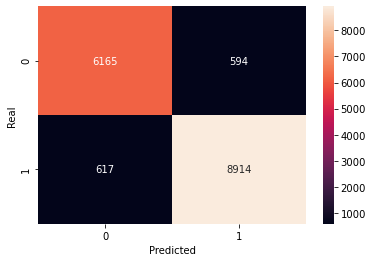

In [30]:
import seaborn as sns

data = {'Y_Real':  Y_test,
        'Y_Prediccion': Y_pred_test
        }

df = pd.DataFrame(data, columns=['Y_Real','Y_Prediccion'])
confusion_matrix = pd.crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [31]:
def roc_chart(clf, y_test):    
    y_test_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve( y_test, y_test_score)
    roc_auc = auc(fpr, tpr)  #AUC Area Under the Curve
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)  
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("High Frequency Trader")
    plt.legend(loc="lower right")
    plt.show()

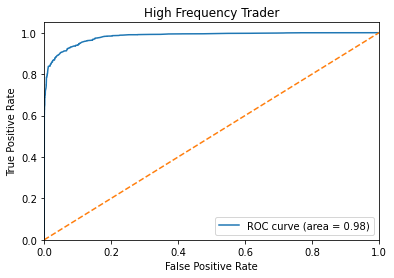

In [32]:
roc_chart(clf, Y_test)

<h2>Results can be can be compared to a Decision Tree <a href="https://github.com/jlunamx86/datascience/blob/master/Decision_Tree.ipynb">here</a></h2>